In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()

# 프로젝트 루트 추가 (노트북이 있는 디렉토리)
project_root = os.path.dirname(os.path.abspath("__file__")) if "__file__" in globals() else os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import time
import functools
def benchmark_runtime_decorator(func):
    @functools.wraps(func)
    def wrapper_benchmark_runtime(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        elapsed_minute = int(elapsed_time / 60) if elapsed_time >= 60 else None
        print(f"Function '{func.__name__}' executed in {f"{elapsed_minute} minutes " if elapsed_minute else ""}{elapsed_time%60:.4f} seconds")
        print(f"Function '{func.__name__}' executed in {elapsed_time:.4f} seconds")
        return result

    return wrapper_benchmark_runtime

In [2]:
from typing import cast
from workflow.rag_agent_workflow_part2 import app_part2, AgentState

initial_state = {
    "job_id": "test_job_001",
    "task_id": "test_task_001",
    "job_info": {
        "description": "정보유출 의심 사례 분석",
        "pc_username": "이정호",
        "pc_userrank": "주임",
        "pc_usercompany": "한국정보보호산업협회"
    },
    "collection_name": "artifacts_collection",
    "db_config": None,
    "filtered_artifacts": [],  # Part 1에서 필터링된 아티팩트 (실제로는 데이터 있음)
    "data_save_status": "success",
    "raw_user_requirements": """
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요."""
}


print("📝 초기 상태:")
print(f"  - Job ID: {initial_state['job_id']}")
print(f"  - Task ID: {initial_state['task_id']}")
print(f"  - 사용자 요구사항: {initial_state['raw_user_requirements']}")
print(f"  - 컬렉션: {initial_state['collection_name']}")

✅ Graph compiled successfully!
✅ Part 2 Graph compiled successfully (에이전트 분석 및 보고서 생성)!
📝 초기 상태:
  - Job ID: test_job_001
  - Task ID: test_task_001
  - 사용자 요구사항: 
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요.
  - 컬렉션: artifacts_collection


E0000 00:00:1761228277.732917 8486445 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1761228277.734640 8486445 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1761228277.735160 8486445 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
/Users/dhkim/Desktop/Unkown/generator/generator_venv/lib/python3.13/site-packages/pydantic/_internal/_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(
/Users/dhkim/Desktop/Unkown/generator/generator_venv/lib/python3.13/site-packages/pydantic/_internal/_generate_schema.py:937: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Settings` to V2.
  warnings.warn(


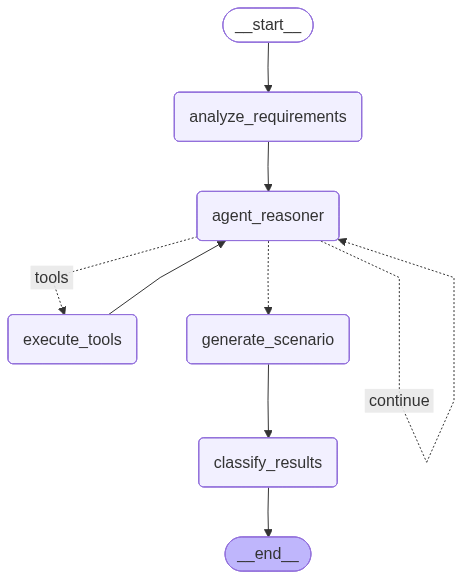

In [3]:
from IPython.display import Image, display
display(Image(app_part2.get_graph(xray=True).draw_mermaid_png()))

In [4]:
try:
    initial_state = cast(AgentState, initial_state)
    # 워크플로우 실행
    print("🚀 워크플로우 실행 시작...\n")
    @benchmark_runtime_decorator
    def run_workflow(initial_state):
        final_state = app_part2.invoke(
            initial_state,
            config={"recursion_limit": 80}  # 재귀 제한 증가
        )  # type: ignore
        return final_state
    final_state = run_workflow(initial_state)

    print("\n" + "="*60)
    print("✅ 워크플로우 실행 완료!")
    print("="*60 + "\n")
        
except Exception as e:
    print(f"\n❌ 오류 발생: {e}")
    import traceback
    traceback.print_exc()

🚀 워크플로우 실행 시작...

--- 📋 Node: 요구사항 분석 중... ---
  ✅ 요구사항 분석 완료
     - 사용자 요구사항: 2128자
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 2개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---


E0000 00:00:1761228343.908440 8488589 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 4개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---


E0000 00:00:1761228360.449414 8489349 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 6개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---


E0000 00:00:1761228385.244339 8490121 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 8개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---


E0000 00:00:1761228404.494970 8491235 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 10개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---


E0000 00:00:1761228420.342598 8491676 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 12개
  💭 추론: 충분한 정보를 수집했습니다. 최종 보고서를 생성하겠습니다.

## 정보유출 분석 최종 보고서

### 1. 분석 개요
- **분석 대상:** 이정호 주임 PC
- **분석 기간:*...
  ✅ 정보 수집 완료 → 보고서 생성 단계로 이동
--- ✅ Agent: 추론 완료 ---
--- 📝 Node: 최종 보고서 생성 중 ---
  📊 분석 대상: 13개 메시지
  🔍 도구 실행 횟수: 5개
  ✅ 보고서 생성 완료:
     - 제목: 교육생 개인정보 유출 의심 건 분석
     - 단계 수: 4개
--- 📝 Node: 데이터 분류 중 ---
Function 'run_workflow' executed in 3 minutes 36.7238 seconds
Function 'run_workflow' executed in 216.7238 seconds

✅ 워크플로우 실행 완료!



In [5]:
# 결과 출력
final_report = final_state.get("final_report")
if final_report:
    print("📊 최종 보고서:")
    print(f"  - 제목: {final_report.name}")
    print(f"  - 설명: {final_report.description}")
    print(f"  - 단계 수: {len(final_report.steps)}개")
    print(f"  - Job ID: {final_report.job_id}")
    print(f"  - Task ID: {final_report.task_id}")
    
    if final_report.steps:
        print("\n  📝 시나리오 단계:")
        for step in final_report.steps:
            print(f"    {step.order_no}. {step.description}")
            print(step.artifact_ids)
else:
    print("⚠️  최종 보고서가 생성되지 않았습니다.")

📊 최종 보고서:
  - 제목: 교육생 개인정보 유출 의심 건 분석
  - 설명: 분석 결과, 이정호 주임의 PC에서 '교육생 개인정보'를 외부로 유출했다고 판단할 만한 명확한 증거는 발견되지 않았습니다. 외부 저장 장치(USB), 메신저, 클라우드 등을 통한 파일 유출 정황이 식별되지 않았으며, '교육생 개인정보', '이력서', '명단' 등 민감 키워드를 포함한 파일의 생성, 접근, 삭제 기록 또한 발견되지 않았습니다. 분석된 파일 접근 및 삭제 기록은 모두 정상적인 교육 프로그램 운영 업무의 일환으로 판단됩니다.
  - 단계 수: 4개
  - Job ID: test_job_001
  - Task ID: test_task_001

  📝 시나리오 단계:
    1. 다수의 'S-개발자 프로젝트 멘토링 보고서' 및 '팀 프로젝트 개별 활동보고서' 파일 삭제. 보고서 취합 및 정리 과정으로 보임.
['f47af92f-22fc-44e4-86c4-2fcaf1449e21', '2d358ec6-2bb1-4bab-9278-552a75ee7007', '763f815e-e043-43ea-b748-88acffc02ff0']
    2. 다수의 'S-개발자 개별 활동보고서' 및 '멘토링 보고서' 파일 삭제. 보고서 취합 및 정리 과정으로 보임.
['ef3c04d6-2ea7-4fd5-9bb1-0ddc90a2fb02', '9026ee87-2713-43da-8cae-83041893630d', '0117466f-ddc4-45e4-86d5-0b154409cb3c', 'da13df2c-0b2f-4948-9f4b-42fb492794e9']
    3. '2025 S-개발자 강사간담회 회의자료' 파일에 접근. 정상적인 교육 프로그램 운영 업무로 판단됨.
['0e4851cd-3c20-4e4d-8029-e319f3ac30ce']
    4. 다수의 교육생 '개별보고서' 파일에 접근. 보고서 확인 및 평가 등 정상 업무로 판단됨.
['a6d53aa9-4273-47e7-bf76-769f3f27a80

In [6]:
# 에이전트 메시지 디버깅
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, ToolMessage
import json

messages = final_state["messages"]

# 1. 메시지 종류별 통계
print("=" * 60)
print("📊 메시지 종류별 통계")
print("=" * 60)

message_types = {}
for msg in messages:
    msg_type = type(msg).__name__
    message_types[msg_type] = message_types.get(msg_type, 0) + 1

for msg_type, count in message_types.items():
    print(f"  {msg_type}: {count}개")

print(f"\n  전체 메시지 수: {len(messages)}개\n")

# 2. 메시지 프린트
print("=" * 60)
print("💬 메시지 상세 내역")
print("=" * 60)

for idx, msg in enumerate(messages, 1):
    msg_type = type(msg).__name__
    
    print(f"\n[{idx}] {msg_type}")
    print("-" * 60)
    
    if isinstance(msg, (HumanMessage, SystemMessage, AIMessage)):
        content = msg.content
        if isinstance(content, str) and len(content) > 200:
            print(f"{content}")
        else:
            print(f"{content}")
    
    if isinstance(msg, ToolMessage):
        print(f"Tool: {msg.name if hasattr(msg, 'name') else 'N/A'}")
        content = msg.content
        try:
            # JSON 문자열인 경우 파싱하여 예쁘게 출력
            parsed = json.loads(content) # type: ignore
            print(json.dumps(parsed, indent=2, ensure_ascii=False))
        except (json.JSONDecodeError, TypeError):
            # JSON이 아니면 원본 그대로 출력
            if isinstance(content, str) and len(content) > 200:
                print(f"{content}")
            else:
                print(f"{content}")
    
    if isinstance(msg, AIMessage) and hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"도구 호출: {len(msg.tool_calls)}개")
        for tool_call in msg.tool_calls:
            print(f"  - {tool_call.get('name', 'N/A')}")

print("\n" + "=" * 60)

📊 메시지 종류별 통계
  SystemMessage: 1개
  HumanMessage: 1개
  AIMessage: 6개
  ToolMessage: 5개

  전체 메시지 수: 13개

💬 메시지 상세 내역

[1] SystemMessage
------------------------------------------------------------
당신은 디지털 포렌식 분석 전문 에이전트입니다.

## 역할
벡터 데이터베이스의 디지털 포렌식 아티팩트를 분석하여 정보유출 시나리오를 재구성합니다.
반드시 증거 기반으로 분석하고, 추측은 최소화하며 보수적으로 판단합니다.

## 분석 목표
- 정보유출 행위 식별: 정보 수집, 외부 유출, 증거 삭제
- 사용자 요구사항에 따른 행위 식별
- 일반적인 업무 패턴은 분석 대상에서 제외

## 분석 대상
- 웹 브라우저 기록 (접속, 다운로드, 검색)
- Prefetch 파일 (프로그램 실행 기록)
- 메신저 로컬 파일 (복호화 불가)
- 삭제된 파일 (휴지통, MFT)
- LNK 파일 (파일 접근 기록)
- USB 레지스트리 정보

수집된 메타데이터:
**데이터베이스 메타데이터:**
- 전체 아티팩트 수: 2,712개
- 사용 가능한 Artifact Types: ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_data', 'Edge.urls_data', 'Edge.visited_links_data', 'Edge.visits_data', 'KakaoTalk.files_data', 'lnk_files_data', 'recycle_bin_files_data', 'usb_devices_data']
- 시간 범위: 2024-11-06T10:23:58 ~ 2025/09/30 14:50:02.120

## 조사 도구

**search_artifacts_tool** (주요 도구)
- 자연어 검색 목표 입력 → 자동 최적화 결과 반환
- 최초 검색은 외부 

In [7]:
context = final_state["context"]
context_str = ""

if isinstance(context, list):
    context_str = "\n".join(context)
else:
    context_str = context

print(context_str)


- `bd90271a-50ee-40db-a28a-d5919c98ed21`: ActionLogDB.edb-shm
- `688bd733-b618-4620-b617-6ae2e10a5f4a`: 000003.log
- `7a474d9e-b86a-4421-ab24-cb1d6e06be08`: LOG
- `2232dd72-9a3a-40b8-b922-194e55cf81e0`: LOG
- `285dfa27-84a7-423a-974a-f3410c8d1c6e`: LOG
- `c5215f62-4532-4d47-b153-b34a54ada535`: 000003.log
- `ab0a17af-cd33-4322-8b20-05ce01634406`: LOG
- `b842b639-398c-4e73-9a63-9ddbf8f5a197`: LOG
- `364eb510-432e-49bf-a91f-d56035a63782`: LOG.old
- `56d14435-3017-42f7-b003-62377068fa2c`: discord_media_rCURRENT.log
- `82fdde9a-890c-4583-9bfb-01b79889ef87`: 000003.log
- `ec6bd6f8-c7e2-419f-9e62-837129024e3c`: LOG
- `78c0b9ea-f029-438f-9249-302c6ad33b9c`: LOG.old
- `b48947f4-da66-4365-b4e6-e6ec3f6369ed`: discord_media_r2025-10-02_12-59-32.log
- `77a60a93-56db-493f-a20c-8c9a377e2636`: LOG.old
- `0b28df05-8bcb-4388-8e83-1a098f0449e1`: renderer_js.log
- `8b14a6a7-6f3a-4a7c-a658-3e27b303443e`: LOG.old
- `2d6607d8-11ed-44e4-b462-ae2f63a3a99f`: discord_utils.log
- `677db321-46a4-47d6-9f56-25fa067

In [8]:
# ========================================
# PDF Export 모듈 테스트
# ========================================
try:
    from pdf_export import export_report_to_pdf, PDFReportExporter
    from pdf_export import S3Manager
    print("✅ PDF Export 모듈 로드 성공!")
    
    # S3 연결 테스트
    try:
        s3 = S3Manager()
        print("✅ S3Manager 초기화 성공!")
        
        if s3.check_connection():
            print("✅ S3 연결 성공!")
        else:
            print("⚠️  S3 연결 실패 - .env 파일을 확인하세요")
    except Exception as e:
        print(f"⚠️  S3 설정 필요: {e}")
        print("\n💡 .env 파일에 다음을 추가하세요:")
        print("   S3_BUCKET_NAME=your-bucket-name")
        print("   AWS_REGION=ap-northeast-2")
        print("   AWS_ACCESS_KEY_ID=your-key")
        print("   AWS_SECRET_ACCESS_KEY=your-secret")
        
except ImportError as e:
    print(f"❌ 모듈 임포트 실패: {e}")
    print("\n📁 파일 구조를 확인하세요:")
    print("   GENERATOR/")
    print("   ├── pdf_export/")
    print("   │   ├── __init__.py")
    print("   │   ├── exporter.py")
    print("   │   ├── pdf_generator.py")
    print("   │   └── s3_manager.py")
    print("   └── 데이터_분석_에이전트_그래프.ipynb")

❌ 모듈 임포트 실패: No module named 'reportlab'

📁 파일 구조를 확인하세요:
   GENERATOR/
   ├── pdf_export/
   │   ├── __init__.py
   │   ├── exporter.py
   │   ├── pdf_generator.py
   │   └── s3_manager.py
   └── 데이터_분석_에이전트_그래프.ipynb
